导入python库

In [1]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import cv2

Using TensorFlow backend.


加载mnist数据集

In [2]:
data=np.loadtxt('data/train.csv',delimiter=',',skiprows=1)
X=data[:,1:]
X_reshaped=X.reshape((X.shape[0],28,28))
Y=data[:,0]
print(X.shape)

(42000, 784)


查看数据集的前9张图片

In [ ]:
plt.subplot(3,3,1)
plt.imshow(X_reshaped[0],cmap = plt.cm.gray_r)
plt.subplot(3,3,2)
plt.imshow(X_reshaped[1],cmap = plt.cm.gray_r)
plt.subplot(3,3,3)
plt.imshow(X_reshaped[2],cmap = plt.cm.gray_r)
plt.subplot(3,3,4)
plt.imshow(X_reshaped[3],cmap = plt.cm.gray_r)
plt.subplot(3,3,5)
plt.imshow(X_reshaped[4],cmap = plt.cm.gray_r)
plt.subplot(3,3,6)
plt.imshow(X_reshaped[5],cmap = plt.cm.gray_r)
plt.subplot(3,3,7)
plt.imshow(X_reshaped[6],cmap = plt.cm.gray_r)
plt.subplot(3,3,8)
plt.imshow(X_reshaped[7],cmap = plt.cm.gray_r)
plt.subplot(3,3,9)
plt.imshow(X_reshaped[8],cmap = plt.cm.gray_r)
plt.show()
print(Y[:9])

定义kNN算法类

In [ ]:
class NearestNeighbor:
    def __init__(self):
        pass
    def train(self,X,Y):
        self.Xtr=X
        self.Ytr=Y
    def predict(self,X,Y):
        time_start=datetime.datetime.now()
        distances=np.sum(np.abs(self.Xtr-X),axis=1)
        min_index=np.argmin(distances)
        Ypred=self.Ytr[min_index]
        time_end=datetime.datetime.now()
        print("Running time:            "+str((time_end-time_start).total_seconds())+'s')
        print("Predicted label:         "+str(int(Ypred)))
        print("True label:              "+str(int(Y)))
        print("Nearest neighbor picture:"+str(min_index))
        return Ypred
    def predict_no_print(self,X,Y):
        time_start=datetime.datetime.now()
        distances=np.sum(np.abs(self.Xtr-X),axis=1)
        min_index=np.argmin(distances)
        Ypred=self.Ytr[min_index]
        time_end=datetime.datetime.now()
        return Ypred        

In [ ]:
method=NearestNeighbor()
method.train(X[:10],Y[:10])
method.predict(X[10],Y[10])

In [ ]:
plt.imshow(X_reshaped[8],cmap = plt.cm.gray_r)
plt.show()
plt.imshow(X_reshaped[10],cmap = plt.cm.gray_r)
plt.show()

In [ ]:
method.train(X[:1000],Y[:1000])
method.predict(X[1000],Y[1000])

In [ ]:
plt.imshow(X_reshaped[1000],cmap = plt.cm.gray_r)
plt.show()
plt.imshow(X_reshaped[2],cmap = plt.cm.gray_r)
plt.show()

In [ ]:
method.train(X[:-1],Y[:-1])
method.predict(X[-1],Y[-1])

In [ ]:
plt.imshow(X_reshaped[-1],cmap = plt.cm.gray_r)
plt.show()
plt.imshow(X_reshaped[19722],cmap = plt.cm.gray_r)
plt.show()

In [ ]:
img=cv2.imread('1.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=255-img
#print(img)
plt.imshow(img,cmap = plt.cm.gray_r)
plt.show()
img_shaped=img.reshape((-1))

In [ ]:
method=NearestNeighbor()
method.train(X,Y)
method.predict(img_shaped,9)

In [ ]:
plt.imshow(img,cmap = plt.cm.gray_r)
plt.show()
plt.imshow(X_reshaped[29151],cmap = plt.cm.gray_r)
plt.show()

In [ ]:
import numpy as np

线性分类

In [3]:
def linear_function(W,X,b):
    return W.dot(X)+b

In [4]:
X_num=np.array([56,231,24,2])
W=np.array([[0.2,-0.5,0.1,2.0],
           [1.5,1.3,2.1,0.0],
           [0,0.25,0.2,-0.3]])
b=np.array([1.1,3.2,-1.2])
print(linear_function(W,X_num,b))

[ -96.8   437.9    60.75]


In [5]:
def linear_function(X,W,b):
    return W.dot(X.T)+b

In [6]:
def sigmoid(X):
    s=1/(1+np.exp(-X))
    return s

In [7]:
def initialization(n_x,n_y):
    W=np.random.randn(n_y,n_x)*0.1
    b=np.zeros((n_y,1))*0.1
    return W,b

In [8]:
def forward_propagation(X,W,b):
    Z=linear_function(X,W,b)
    A=sigmoid(Z)
    cache={'Z':Z,'A':A}
    return A,cache

In [9]:
X_temp=X/255.0
Y_temp=to_categorical(Y.T)
print(X_temp.shape)
W,b=initialization(784,10)
Z=linear_function(X_temp,W,b)
A=sigmoid(Z)

(42000, 784)


In [10]:
def compute_cost(A,Y):
    m=Y.shape[1]
    #logprobs = np.multiply(np.log(A+(1e-13)),Y)+np.multiply(np.log(1-A+(1e-13)),1-Y)
    logprobs = np.multiply(np.log(A),Y)+np.multiply(np.log(1-A),1-Y)
    cost = - np.sum(logprobs)/m
    cost = np.squeeze(cost)
    return cost

In [11]:
print(compute_cost(A,Y_temp.T))

8.84830624474


In [12]:
A,cache=forward_propagation(X_temp,W,b)

In [13]:
def backward_propagation(W,b,cache,X,Y):
    m=X.shape[1]
    Z=cache['Z']
    A=cache['A']
    dZ=A-Y
    dW=dZ.dot(X_temp)/m
    db=np.sum(dZ,axis=1,keepdims=True)/m
    grads={'dW':dW,'db':db}
    return grads

In [14]:
grads=backward_propagation(W,b,cache,X_temp,Y_temp.T)

In [15]:
def update_parameters(W,b,grads,learning_rate=0.1):
    dW=grads['dW']
    db=grads['db']
    W=W-learning_rate*dW
    b=b-learning_rate*db
    return W,b

In [16]:
W,b=update_parameters(W,b,grads,1.2)

In [17]:
def model(X,Y,num_iterations=1000):
    W,b= initialization(784,10)
    for i in range(0,num_iterations):
        A,cache=forward_propagation(X,W,b)
        cost=compute_cost(A,Y)
        grads=backward_propagation(W,b,cache,X,Y)
        W,b=update_parameters(W,b,grads,0.01)
        #if(i % 100 == 0):
        print ("Cost after iteration %i: %f" %(i, cost))
    return W,b

In [18]:
W,b=model(X_temp,Y_temp.T,5)
print(X_temp.shape)

Cost after iteration 0: 6.813575
Cost after iteration 1: 6.241434
Cost after iteration 2: 4.152227
Cost after iteration 3: 2.814161
Cost after iteration 4: 2.196817
Cost after iteration 5: 1.985240
Cost after iteration 6: 1.870192
Cost after iteration 7: 1.785998
Cost after iteration 8: 1.717136
Cost after iteration 9: 1.658783
Cost after iteration 10: 1.608389
Cost after iteration 11: 1.564341
Cost after iteration 12: 1.525418
Cost after iteration 13: 1.490718
Cost after iteration 14: 1.459537
Cost after iteration 15: 1.431325
Cost after iteration 16: 1.405643
Cost after iteration 17: 1.382136
Cost after iteration 18: 1.360518
Cost after iteration 19: 1.340548
(42000, 784)


In [19]:
def model_pretrained(X,Y,num_iterations=100):
    W=np.load('W.npy')
    b=np.load('b.npy')
    #W,b= initialization(784,10)
    for i in range(0,num_iterations):
        A,cache=forward_propagation(X,W,b)
        cost=compute_cost(A,Y)
        grads=backward_propagation(W,b,cache,X,Y)
        W,b=update_parameters(W,b,grads,0.01)
        #if(i % 100 == 0):
        print ("Cost after iteration %i: %f" %(i, cost))
    np.save('W.npy',W)
    np.save('b.npy',b)
    return W,b

In [48]:
W1,b1=model_pretrained(X_temp,Y_temp.T,300)

Cost after iteration 0: 0.636628
Cost after iteration 1: 0.636610
Cost after iteration 2: 0.636592
Cost after iteration 3: 0.636574
Cost after iteration 4: 0.636557
Cost after iteration 5: 0.636539
Cost after iteration 6: 0.636521
Cost after iteration 7: 0.636503
Cost after iteration 8: 0.636485
Cost after iteration 9: 0.636467
Cost after iteration 10: 0.636450
Cost after iteration 11: 0.636432
Cost after iteration 12: 0.636414
Cost after iteration 13: 0.636396
Cost after iteration 14: 0.636378
Cost after iteration 15: 0.636361
Cost after iteration 16: 0.636343
Cost after iteration 17: 0.636325
Cost after iteration 18: 0.636308
Cost after iteration 19: 0.636290
Cost after iteration 20: 0.636272
Cost after iteration 21: 0.636254
Cost after iteration 22: 0.636237
Cost after iteration 23: 0.636219
Cost after iteration 24: 0.636201
Cost after iteration 25: 0.636184
Cost after iteration 26: 0.636166
Cost after iteration 27: 0.636149
Cost after iteration 28: 0.636131
Cost after iteration 29:

Cost after iteration 238: 0.632665
Cost after iteration 239: 0.632650
Cost after iteration 240: 0.632634
Cost after iteration 241: 0.632619
Cost after iteration 242: 0.632603
Cost after iteration 243: 0.632588
Cost after iteration 244: 0.632572
Cost after iteration 245: 0.632557
Cost after iteration 246: 0.632541
Cost after iteration 247: 0.632526
Cost after iteration 248: 0.632511
Cost after iteration 249: 0.632495
Cost after iteration 250: 0.632480
Cost after iteration 251: 0.632465
Cost after iteration 252: 0.632449
Cost after iteration 253: 0.632434
Cost after iteration 254: 0.632418
Cost after iteration 255: 0.632403
Cost after iteration 256: 0.632388
Cost after iteration 257: 0.632372
Cost after iteration 258: 0.632357
Cost after iteration 259: 0.632342
Cost after iteration 260: 0.632327
Cost after iteration 261: 0.632311
Cost after iteration 262: 0.632296
Cost after iteration 263: 0.632281
Cost after iteration 264: 0.632265
Cost after iteration 265: 0.632250
Cost after iteration

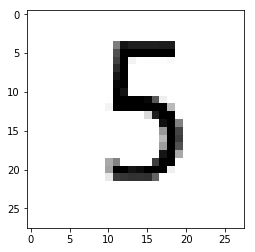

In [42]:
img=cv2.imread('1.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=255-img
#print(img)
plt.imshow(img,cmap = plt.cm.gray_r)
plt.show()
img_shaped=np.array([img.reshape((-1))])
img_shaped=img_shaped/255.0

In [43]:
print(img_shaped.shape)

(1, 784)


In [44]:
print(X_temp.shape)

(42000, 784)


In [45]:
result,_=forward_propagation(img_shaped,W1,b1)

In [46]:
output=np.argmax(result)
print("Predicted number is "+str(output))

Predicted number is 5


In [41]:
print(result)

[[  5.81697452e-04]
 [  2.31402993e-05]
 [  9.18201099e-01]
 [  3.90584905e-04]
 [  1.04693478e-04]
 [  2.84694389e-03]
 [  1.01421246e-03]
 [  1.34631306e-05]
 [  3.43999631e-05]
 [  8.55152983e-05]]
